# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

MAIN_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(MAIN_DIR, 'data')

TRAIN_DATA_NAME = 'UNSW_NB15_training-set.csv'
TEST_DATA_NAME = 'UNSW_NB15_testing-set.csv'

TRAIN_DIR = os.path.join(DATA_DIR, TRAIN_DATA_NAME)
TEST_DIR = os.path.join(DATA_DIR, TEST_DATA_NAME)

## Read Data

In [2]:
df_train = pd.read_csv(TRAIN_DIR)

df_train.shape

(82332, 45)

In [3]:
print(df_train.columns.values)
df_train.head()

['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
df_train.isna().sum().sum()

np.int64(0)

# Split data

In [5]:
df_train.head(2)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0


In [6]:
df_train.groupby('attack_cat').size().sort_values(ascending=False)

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
dtype: int64

In [7]:
fltr = df_train['attack_cat'] != 'Normal'
gr = pd.DataFrame(df_train[fltr].groupby('attack_cat').size(), columns=['count']).reset_index()
gr["pct"] = gr["count"] / gr["count"].sum() * 100
gr = gr.sort_values(by='count', ascending=False)

In [8]:
X = df_train[fltr].drop(columns=["attack_cat","label"])
y = df_train.loc[fltr,["attack_cat"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Clean Data

In [9]:
df_train_cleaned = X_train.dropna(axis=0, how='any')
df_test_cleaned = X_test.dropna(axis=0, how='any')

cols_drop = ['id']
df_train_cleaned = df_train_cleaned.drop(columns=cols_drop)
df_test_cleaned = df_test_cleaned.drop(columns=cols_drop)

In [10]:
df_numeric_train = df_train_cleaned.select_dtypes(include=[np.number])
df_numeric_train.describe(include='all')

df_numeric_test = df_test_cleaned.select_dtypes(include=[np.number])

In [11]:
fltr = df_numeric_train == 0
df_numeric_train = df_numeric_train.astype(float)
df_numeric_train[fltr] = df_numeric_train[fltr] + 1e-9
df_numeric_train = df_numeric_train.map(lambda x: np.log(x))
df_numeric_train

fltr = df_numeric_test == 0
df_numeric_test = df_numeric_test.astype(float)
df_numeric_test[fltr] = df_numeric_test[fltr] + 1e-9
df_numeric_test = df_numeric_test.map(lambda x: np.log(x))
df_numeric_test

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
46463,-0.461466,2.302585,1.791759,7.366445,5.590987,3.169516,5.537334,5.529429,9.802132,7.952553,...,0.000000,0.000000,0.000000,0.000000,-20.723266,-20.723266,0.000000,0.000000,0.000000,-20.723266
53130,-12.429216,0.693147,-20.723266,5.298317,-20.723266,12.429216,5.537334,-20.723266,19.113828,-20.723266,...,1.386294,1.386294,1.386294,1.386294,-20.723266,-20.723266,-20.723266,2.397895,2.639057,-20.723266
55614,2.618487,2.079442,1.791759,5.897154,5.590987,-0.053537,4.127134,5.529429,5.226146,4.872601,...,1.791759,1.098612,0.000000,1.791759,-20.723266,-20.723266,-20.723266,1.791759,0.693147,-20.723266
47879,-0.731308,2.079442,2.302585,5.897154,8.230577,3.564522,4.127134,5.529429,8.575941,10.936085,...,0.693147,0.000000,0.000000,0.693147,-20.723266,-20.723266,-20.723266,0.693147,0.000000,-20.723266
18942,-11.736069,0.693147,-20.723266,4.736198,-20.723266,11.736069,5.537334,-20.723266,17.858562,-20.723266,...,2.772589,2.772589,2.772589,3.526361,-20.723266,-20.723266,-20.723266,2.772589,3.526361,-20.723266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44438,-0.341028,2.302585,1.791759,6.222576,5.590987,3.049078,5.537334,5.529429,8.538567,7.832116,...,1.098612,1.098612,1.098612,1.098612,-20.723266,-20.723266,-20.723266,1.386294,1.386294,-20.723266
43771,-13.122363,0.693147,-20.723266,7.876259,-20.723266,13.122363,5.537334,-20.723266,22.384917,-20.723266,...,0.000000,0.000000,0.000000,0.000000,-20.723266,-20.723266,-20.723266,0.693147,0.693147,-20.723266
12597,-11.869600,0.693147,-20.723266,4.736198,-20.723266,11.869600,5.537334,-20.723266,17.992093,-20.723266,...,2.397895,2.397895,1.791759,2.397895,-20.723266,-20.723266,-20.723266,2.397895,2.397895,-20.723266
44270,-0.242855,3.178054,3.912023,7.035269,10.739912,4.533315,4.127134,5.529429,9.315312,13.042012,...,1.098612,0.000000,0.000000,1.098612,-20.723266,-20.723266,-20.723266,1.098612,0.000000,-20.723266


In [12]:
scaler = StandardScaler()
scaler.fit(df_numeric_train)
df_numeric_scaled_train = scaler.transform(df_numeric_train)
df_numeric_scaled_train = pd.DataFrame(df_numeric_scaled_train, columns=df_numeric_train.columns)

scaler = StandardScaler()
scaler.fit(df_numeric_test)
df_numeric_scaled_test = scaler.transform(df_numeric_test)
df_numeric_scaled_test = pd.DataFrame(df_numeric_scaled_test, columns=df_numeric_test.columns)

### Categorigal transformation

reduce categories dimensionality, select top K categories

In [13]:
class CardinalityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=5, placeholder='otros'):
        self.top_n = top_n
        self.placeholder = placeholder
        self.top_categories_ = {}

    def fit(self, X, y=None):
        X = X.copy()
        for col in X.select_dtypes(include='object'):
            self.top_categories_[col] = X[col].value_counts().nlargest(self.top_n).index.tolist()
        return self

    def transform(self, X):
        X = X.copy()
        for col, top_vals in self.top_categories_.items():
            X[col] = X[col].where(X[col].isin(top_vals), self.placeholder)
        return X
    
cardinality_reducer = CardinalityReducer(top_n=5, placeholder='otros')

In [14]:
df_categorical_train = df_train_cleaned.select_dtypes(exclude=[np.number])
df_categorical_train

cardinality_reducer.fit(df_categorical_train)
df_categorical_reduced_train = cardinality_reducer.transform(df_categorical_train)
df_categorical_reduced_train.nunique()

df_categorical_test = df_test_cleaned.select_dtypes(exclude=[np.number])
df_categorical_reduced_test = cardinality_reducer.transform(df_categorical_test)

In [15]:
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(df_categorical_reduced_train)
df_categorical_encoded_train = enc.transform(df_categorical_reduced_train)
df_categorical_encoded_train = pd.DataFrame(df_categorical_encoded_train, columns=enc.get_feature_names_out())

df_categorical_encoded_test = enc.transform(df_categorical_reduced_test)
df_categorical_encoded_test = pd.DataFrame(df_categorical_encoded_test, columns=enc.get_feature_names_out())

In [16]:
train_df = pd.concat([df_numeric_scaled_train, df_categorical_encoded_train], axis=1)

test_df = pd.concat([df_numeric_scaled_test, df_categorical_encoded_test], axis=1)

train_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_http,service_otros,service_smtp,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_otros
0,-0.935394,-0.670146,-0.721333,-0.732778,-0.720058,0.972846,0.214659,-0.722130,0.887705,-0.720440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.935394,-0.670146,-0.721333,0.721799,-0.720058,0.972846,0.214659,-0.722130,1.361249,-0.720440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.371617,1.340832,1.529057,0.785868,1.688106,-1.056749,-1.098225,1.386222,-1.321759,1.643622,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.696539,-0.670146,-0.721333,-0.366710,-0.720058,0.661808,0.214659,-0.722130,0.712972,-0.720440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.815966,-0.670146,-0.721333,-0.732778,-0.720058,0.817327,0.214659,-0.722130,0.740751,-0.720440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36260,1.220349,0.802869,1.346352,0.492314,1.368548,-1.198693,-1.098225,1.386222,-1.241203,1.400119,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36261,1.046019,0.802869,1.397096,0.537709,1.540442,-0.903858,-1.098225,1.386222,-1.012108,1.635076,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36262,-0.641670,-0.670146,-0.721333,-0.732778,-0.720058,0.590357,0.214659,-0.722130,0.526282,-0.720440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36263,1.257619,0.802869,1.346352,0.308441,1.289328,-1.247226,0.214659,1.386222,-1.347009,1.311345,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Modelos

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix

import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

### Logistic Regression

In [18]:
logi_adj = LogisticRegression(random_state=42, max_iter=10000, penalty=None, solver="lbfgs",multi_class='multinomial')
logi_adj.fit(train_df, y_train)
y_pred = logi_adj.predict(test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# dict_accuracy_models["reg_log_ajustado"] = accuracy
print(f'Accuracy: {accuracy:.4f}')

#calculo Precision usado=1
prec = precision_score(y_test, y_pred, average='macro')
# dict_precision_models["reg_log_ajustado"] = prec

#calculo Recall nuevo = 1
rec = recall_score(y_test, y_pred, average='macro')
# dict_recall_models["reg_log_ajustado"] = rec

#calculo F1-Score
f1 = f1_score(y_test, y_pred, average='macro')

model_performance.loc['Logistic Regression'] = [accuracy,
                                                rec,
                                                prec,
                                                f1]

c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7764


c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


,attack_cat,count,pct
5,Generic,18871,41.628430
3,Exploits,11132,24.556605
4,Fuzzers,6062,13.372452
2,DoS,4089,9.020118
6,Reconnaissance,3496,7.711992
0,Analysis,677,1.493426
1,Backdoor,583,1.286067
7,Shellcode,378,0.833848
8,Worms,44,0.097062


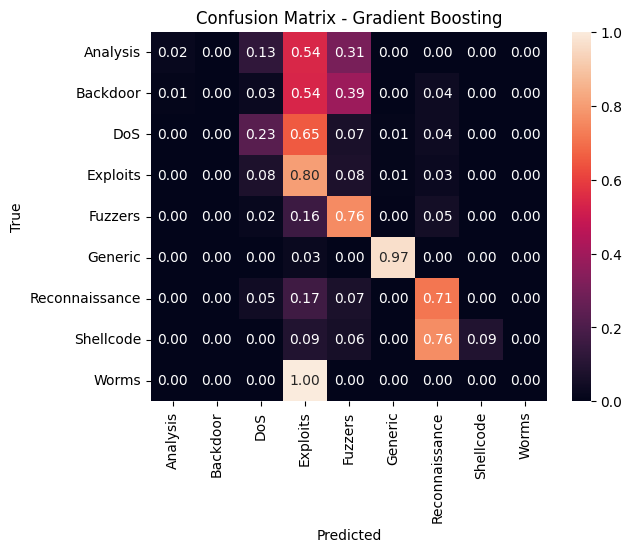

In [19]:
display(gr)
cm = confusion_matrix(y_test, y_pred, labels=logi_adj.classes_, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=logi_adj.classes_, yticklabels=logi_adj.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [20]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Analysis       0.38      0.02      0.04       140
      Backdoor       0.00      0.00      0.00       106
           DoS       0.44      0.23      0.30       862
      Exploits       0.61      0.80      0.69      2191
       Fuzzers       0.71      0.76      0.74      1238
       Generic       0.99      0.97      0.98      3780
Reconnaissance       0.68      0.71      0.70       673
     Shellcode       0.43      0.09      0.15        68
         Worms       0.00      0.00      0.00         9

      accuracy                           0.78      9067
     macro avg       0.47      0.40      0.40      9067
  weighted avg       0.76      0.78      0.76      9067



c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [21]:
pd.DataFrame(logi_adj.coef_.T, index=logi_adj.feature_names_in_, columns=logi_adj.classes_)

,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Reconnaissance,Shellcode,Worms
dur,-0.615325,-0.532934,-0.497642,-0.544983,-0.299058,-0.296413,-0.402241,0.956629,2.231967
spkts,-0.036872,1.471894,1.818126,8.007327,6.169326,-0.764079,-13.405479,-2.794785,-0.465457
dpkts,-7.521012,3.871995,4.758750,-3.167463,-22.706128,3.816087,24.617026,-7.090075,3.420822
sbytes,0.114497,-0.930431,-1.371243,-9.901779,-3.531327,0.737117,18.579301,-4.055325,0.359190
dbytes,-6.311889,-7.271749,8.475502,11.009774,3.570450,11.185060,-10.480461,-14.364614,4.187926
rate,-1.136715,0.027183,-5.829714,-2.630293,10.829762,-2.497485,3.352419,-6.764110,4.648953
sttl,-7.556000,-2.895973,-2.774756,-2.818438,7.985715,-1.957498,-0.085191,3.873536,6.228605
dttl,1.002489,6.193823,-6.303661,0.662478,-1.764545,-18.811583,16.482360,5.324561,-2.785923
sload,9.749920,-1.522622,3.579158,0.570546,-11.532110,0.646890,-4.517132,6.301920,-3.276570
dload,3.761420,8.690458,1.144026,-0.117491,-12.448288,2.188125,-8.387156,5.069165,0.099741


### Gradient Boosting

In [22]:
xgb = GradientBoostingClassifier()
xgb.fit(train_df, y_train)

y_pred = xgb.predict(test_df)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# dict_accuracy_models["reg_log_ajustado"] = accuracy
print(f'Accuracy: {accuracy:.4f}')

#calculo Precision usado=1
prec = precision_score(y_test, y_pred, average='macro')
# dict_precision_models["reg_log_ajustado"] = prec

#calculo Recall nuevo = 1
rec = recall_score(y_test, y_pred, average='macro')
# dict_recall_models["reg_log_ajustado"] = rec

#calculo F1-Score
f1 = f1_score(y_test, y_pred, average='macro')

model_performance.loc['XGBoost'] = [accuracy,
                                    rec,
                                    prec,
                                    f1]

c:\Users\Paul\anaconda3\envs\meli_cyber_ai\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7682


In [23]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Analysis       1.00      0.06      0.11       140
      Backdoor       0.33      0.02      0.04       106
           DoS       0.59      0.09      0.15       862
      Exploits       0.56      0.86      0.68      2191
       Fuzzers       0.79      0.69      0.74      1238
       Generic       0.98      0.98      0.98      3780
Reconnaissance       0.95      0.59      0.73       673
     Shellcode       0.52      0.53      0.53        68
         Worms       0.00      0.11      0.01         9

      accuracy                           0.77      9067
     macro avg       0.64      0.44      0.44      9067
  weighted avg       0.80      0.77      0.75      9067



,attack_cat,count,pct
5,Generic,18871,41.628430
3,Exploits,11132,24.556605
4,Fuzzers,6062,13.372452
2,DoS,4089,9.020118
6,Reconnaissance,3496,7.711992
0,Analysis,677,1.493426
1,Backdoor,583,1.286067
7,Shellcode,378,0.833848
8,Worms,44,0.097062


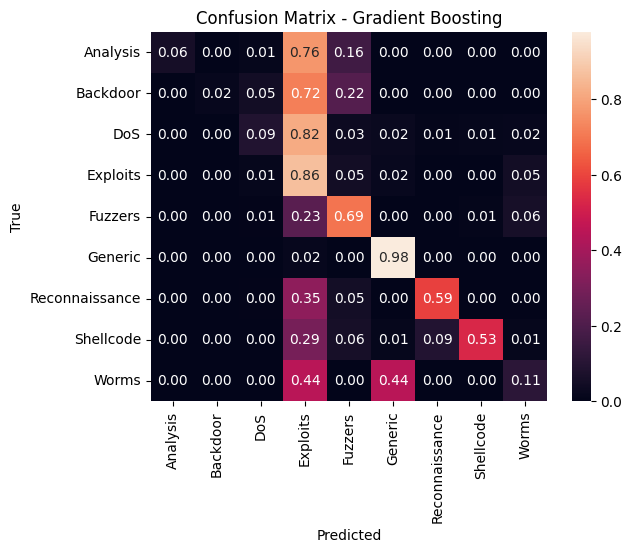

In [24]:
display(gr)
cm = confusion_matrix(y_test, y_pred, labels=logi_adj.classes_, normalize='true')
sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=logi_adj.classes_, yticklabels=logi_adj.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

In [25]:
feature_importances = xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': train_df.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(10)

,Feature,Importance
46,service_dns,0.435940
3,sbytes,0.125607
6,sttl,0.122058
23,smean,0.088395
37,ct_srv_dst,0.039163
45,service_-,0.030491
8,sload,0.025806
24,dmean,0.020482
27,ct_srv_src,0.020062
4,dbytes,0.017982


In [26]:
model_performance

,Accuracy,Recall,Precision,F1-Score
Logistic Regression,0.776442,0.398023,0.470560,0.399115
XGBoost,0.768170,0.436422,0.636913,0.439643
